# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
# http://pytorch.org/
from os.path import exists
import torch

In [2]:
# pip install Pillow==9.4.0

In [3]:
from PIL import __version__
print(__version__)

11.2.1


In [4]:
! pip install torchvision==0.2.0

Reason for being yanked: So that users won't accidentally install this when using python 3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

O MNIST é um banco de dados famoso contendo imagens de dígitos manuscritos (de 0 a 9). Cada uma dessas imagens:

- É em preto e branco (escala de cinza).

- Tem resolução de 28×28 pixels.

- Cada pixel tem um valor entre 0 e 255, indicando o nível de cinza (0 = preto, 255 = branco, valores intermediários = tons de cinza).

In [6]:
#Clonar o repositório no Github

! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 10.32 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [7]:
 #listar os arquivos e pastas do diretório
!ls MNIST

processed  raw


In [8]:
#Obtenção dos dados de entrada (X_train) e saída (Y_train)

dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


In [9]:
# 60000 imagens de 28x28 pixels
x_train.shape

torch.Size([60000, 28, 28])

### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [10]:
x_train = x_train.float()

x_train = x_train / 255. # Normalizar os dados entre 0 e 1

if True:
    n_samples_train = 10000 # Número de amostras que serão utilizadas

    x_train = x_train[:n_samples_train] #Filtrar as n amostras dos dados de entrada
    y_train = y_train[:n_samples_train] #Filtrar as n amostras dos dados de saída

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 10000

Dimensões dos dados das imagens:    torch.Size([10000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(116.5), np.float64(-0.5))

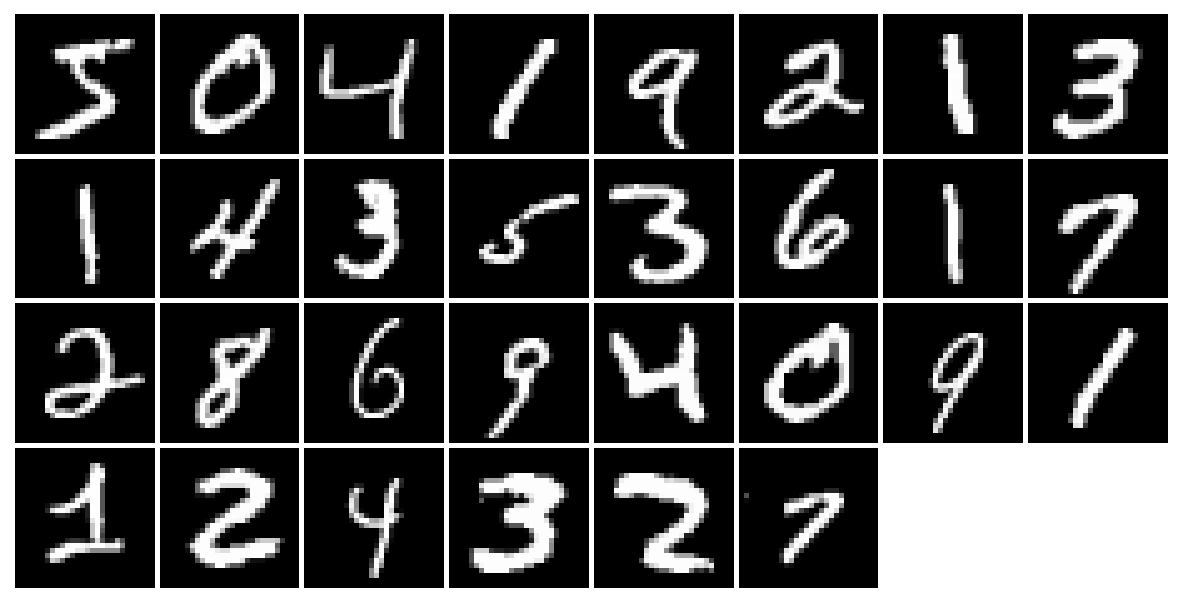

In [11]:
#Visualizando as 30 primeiras amostras

n_samples = 30

# cria um grid com as imagens
#unsqueeze(dim=1) adiciona um canla de cor à imagem (cinza = 1 canal)
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0)) #grid.numpy converter o tensor Pytorch para array numpy
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


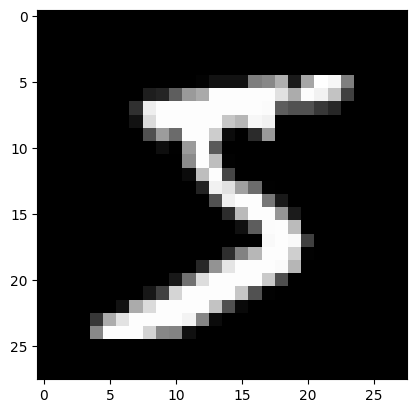

In [12]:
#Visualização da imagem

image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [13]:
#Formatação numérica da Imagem

x_train[0] #1 imagem de 28x28 pixels


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

class: tensor(5)


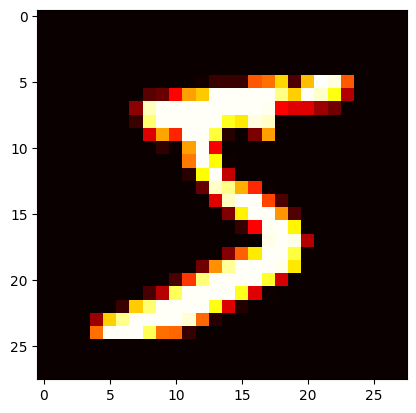

class: tensor(0)


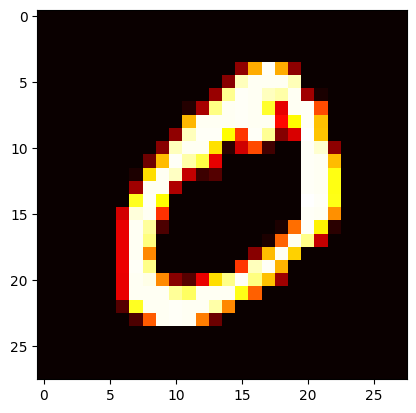

class: tensor(4)


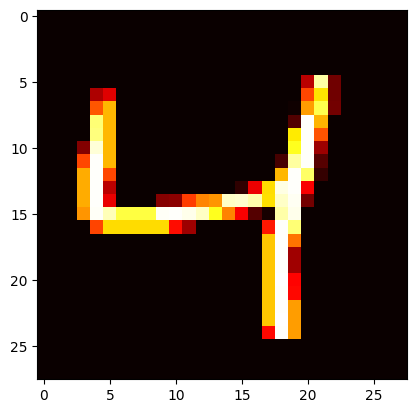

class: tensor(1)


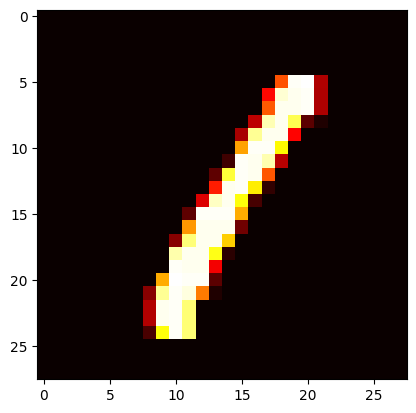

class: tensor(9)


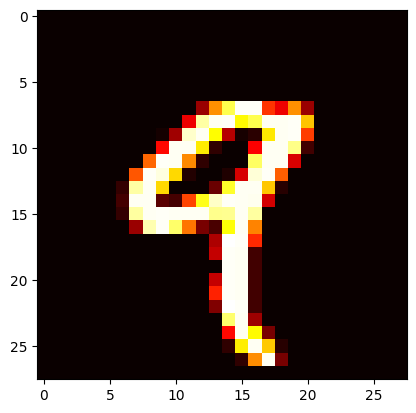

class: tensor(2)


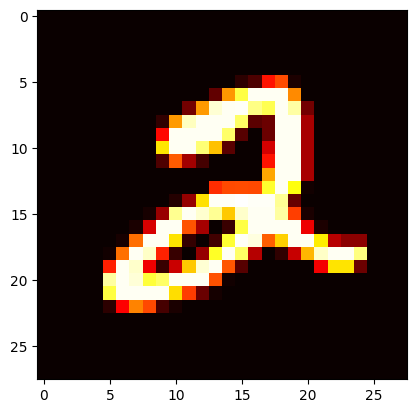

class: tensor(1)


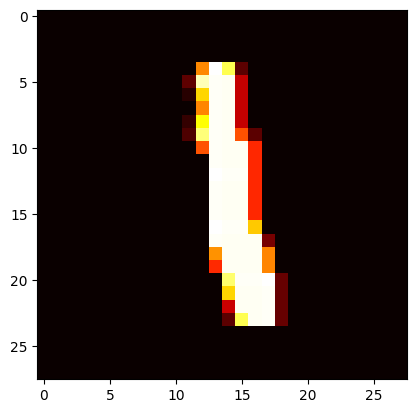

class: tensor(3)


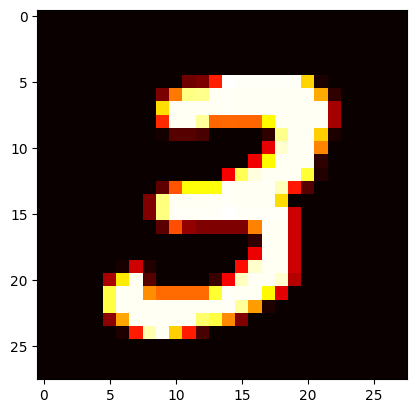

class: tensor(1)


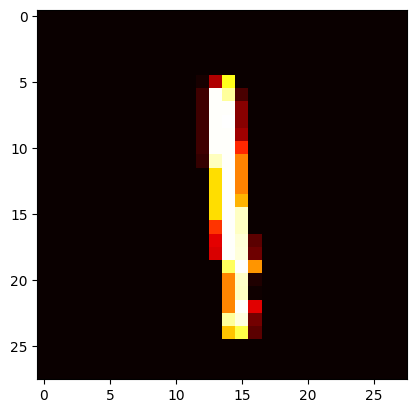

class: tensor(4)


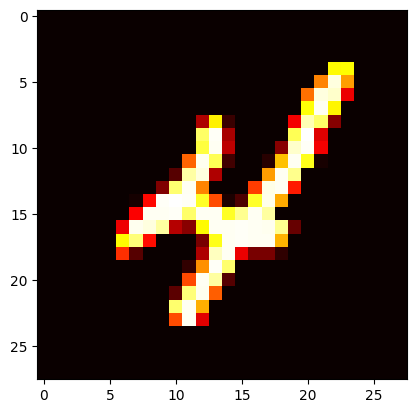

In [14]:
#Outra forma de visualizar as imagens

for i in range(0,10):
  imagem = x_train[i]
  plt.imshow(imagem.numpy(), cmap='hot') #Transformar de Tensor para array numpy para visualizar com Matplotlib
  print('class:', y_train[i])
  plt.show()


## Modelo

In [15]:
# Rede Linear com 28*28 (784) variáveis de entrada e 10 variáveis de sáida
model = torch.nn.Linear(28*28, 10)

In [16]:
x_train.shape

torch.Size([10000, 28, 28])

### Testando um predict com poucas amostras

In [17]:
#Pesos inicializados no modelo

model.weight.data.shape

torch.Size([10, 784])

In [18]:
#Bias inicializados no modelo

model.bias.data.shape

torch.Size([10])

In [19]:
# Transforma o shape de x_train[:5] de [5x 28 x 28] para [5 x 784]

xin = x_train[:5].view(-1,28*28)


In [20]:
print(x_train[0].shape)
x_train[0]

torch.Size([28, 28])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [21]:
print(xin[0].shape)
xin[0]

torch.Size([784])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [22]:
#Predição sem treinamento, com os valores de pesos e bias inicializados na rede
#5 linhas (5 instâncias) com 10 colunas cada (saídas do modelo)
out = model(Variable(xin))
out

tensor([[ 0.1747,  0.1093,  0.2893, -0.0978, -0.2620,  0.0449, -0.2505, -0.0257,
          0.1829, -0.1084],
        [ 0.4032,  0.3752,  0.3769,  0.1278, -0.2120, -0.2470, -0.0398,  0.1185,
         -0.0057, -0.0874],
        [ 0.1840,  0.0734,  0.3018,  0.0210, -0.1676, -0.1124,  0.0438,  0.0013,
         -0.1409, -0.1587],
        [-0.0079, -0.0917,  0.2647, -0.0408,  0.0209, -0.0721, -0.0979, -0.0797,
         -0.0407, -0.0551],
        [ 0.2255,  0.0818,  0.5391,  0.0928, -0.1441, -0.1972, -0.1388, -0.0033,
          0.1256, -0.0212]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [23]:
epochs = 100 # Número de épocas
learningRate = 0.3 # Taxa de aprendizado

# Utilizaremos CrossEntropyLoss como função de perda
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [24]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-mwuft28p
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-mwuft28p
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=334b0cec7f34bf8cf6adfcfdeb98319f4d1c48351e0f2c1bf35dd6b61b0edc28
  Stored in directory: /tmp/pip-ephem-wheel-cache-wfkcn6l2/wheels/63/59/c1/3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


loss 2.3425190448760986


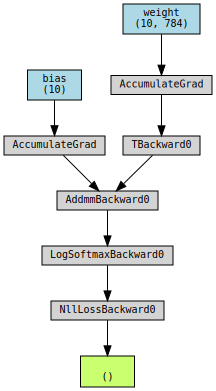

In [25]:
#Perda inicial

# Grafo computacional

from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
print(f'loss {loss}')
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Epoch[1/100], loss geral: 2.342519, acc geral: 0.084900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


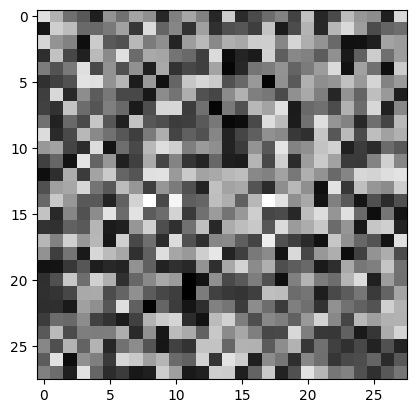

Epoch[2/100], loss geral: 2.021751, acc geral: 0.488000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


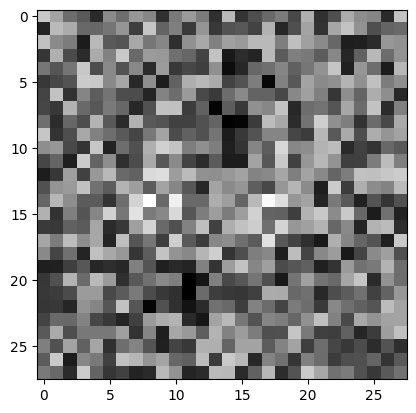

Epoch[3/100], loss geral: 1.774507, acc geral: 0.688900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


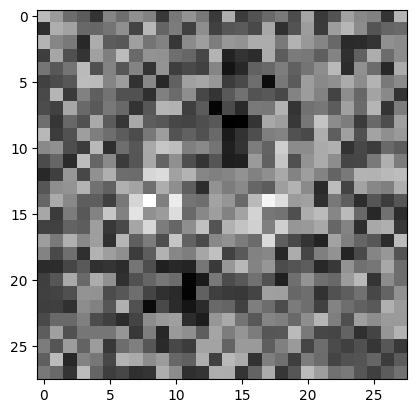

Epoch[4/100], loss geral: 1.580950, acc geral: 0.735900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


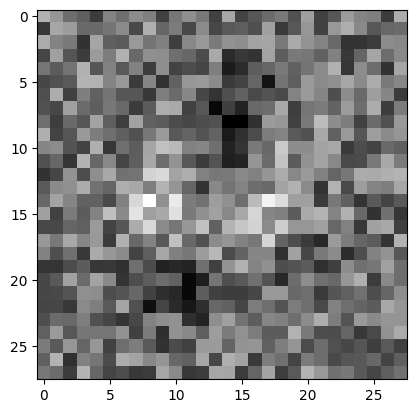

Epoch[5/100], loss geral: 1.429321, acc geral: 0.761500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


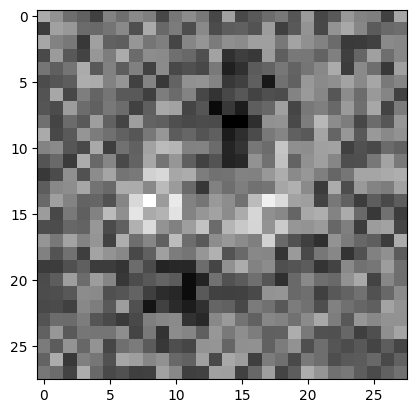

Epoch[6/100], loss geral: 1.309320, acc geral: 0.779000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


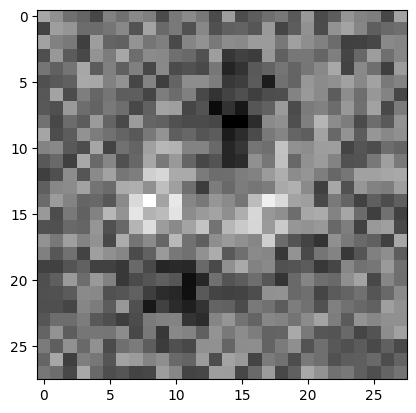

Epoch[7/100], loss geral: 1.212923, acc geral: 0.793400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


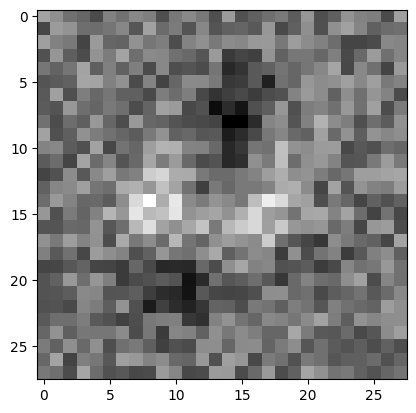

Epoch[8/100], loss geral: 1.134209, acc geral: 0.803600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


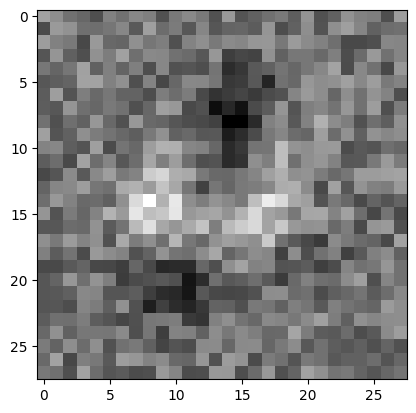

Epoch[9/100], loss geral: 1.068901, acc geral: 0.809400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


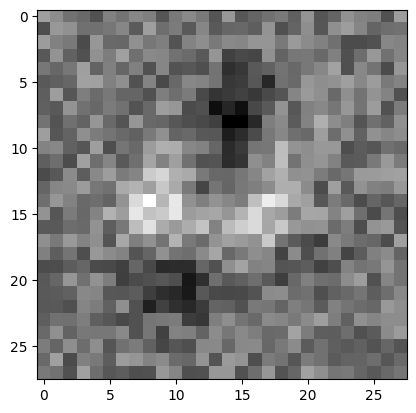

Epoch[10/100], loss geral: 1.013913, acc geral: 0.816700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


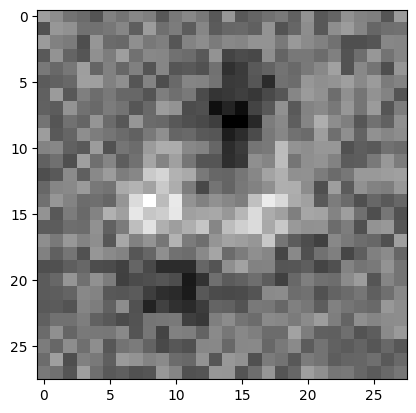

Epoch[11/100], loss geral: 0.966994, acc geral: 0.822100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


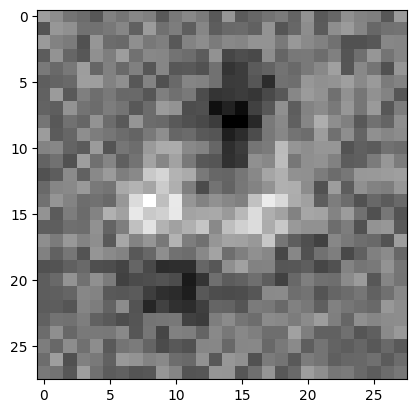

Epoch[12/100], loss geral: 0.926487, acc geral: 0.827300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


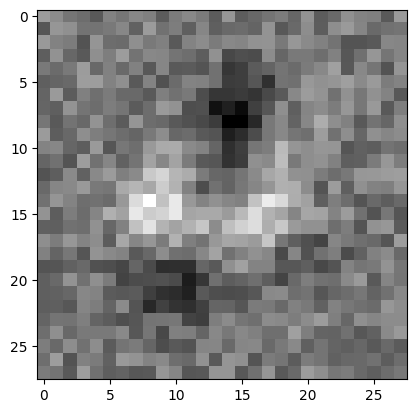

Epoch[13/100], loss geral: 0.891147, acc geral: 0.832800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


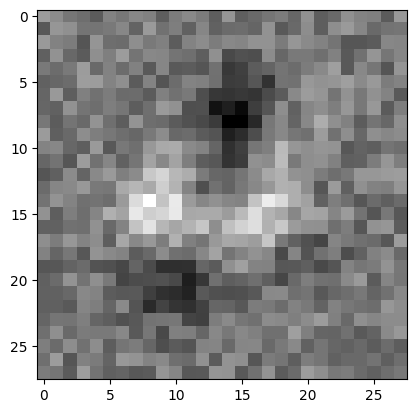

Epoch[14/100], loss geral: 0.860028, acc geral: 0.836000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


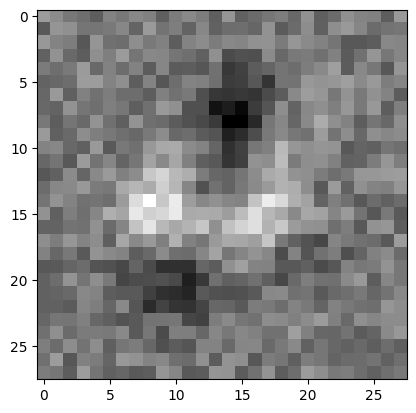

Epoch[15/100], loss geral: 0.832401, acc geral: 0.838700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


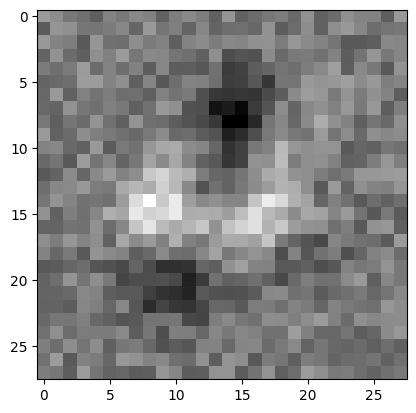

Epoch[16/100], loss geral: 0.807692, acc geral: 0.841200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


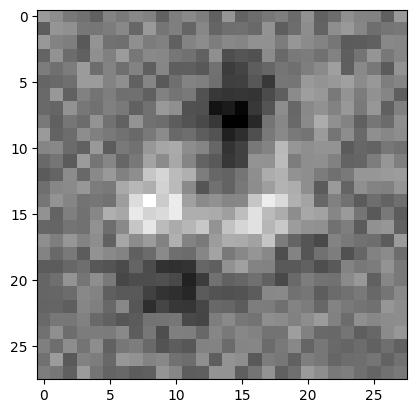

Epoch[17/100], loss geral: 0.785449, acc geral: 0.843500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


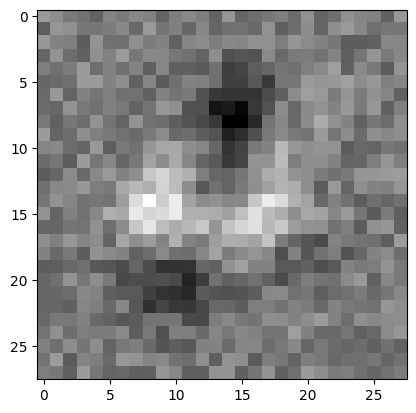

Epoch[18/100], loss geral: 0.765307, acc geral: 0.844900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


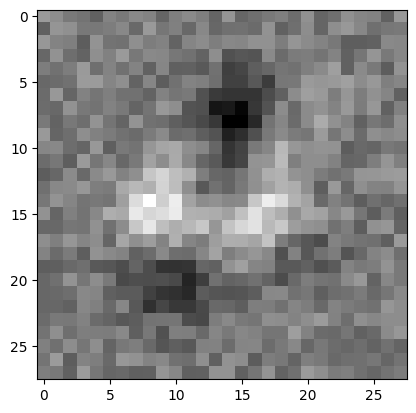

Epoch[19/100], loss geral: 0.746970, acc geral: 0.847100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


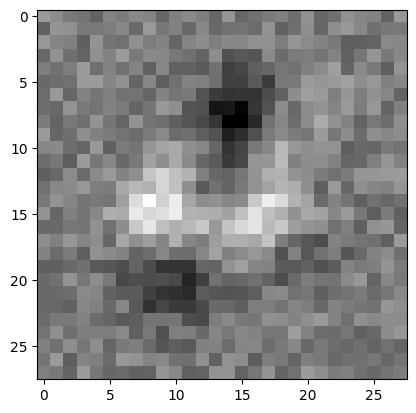

Epoch[20/100], loss geral: 0.730197, acc geral: 0.849700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


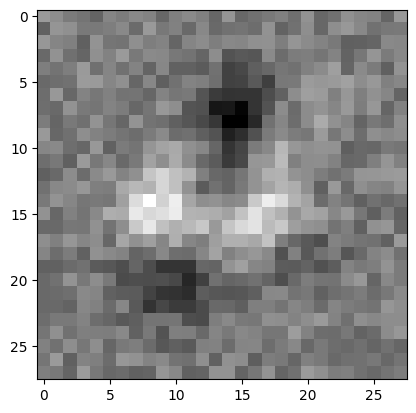

Epoch[21/100], loss geral: 0.714787, acc geral: 0.852000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


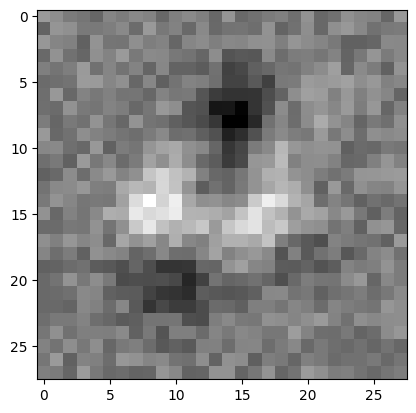

Epoch[22/100], loss geral: 0.700573, acc geral: 0.853200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


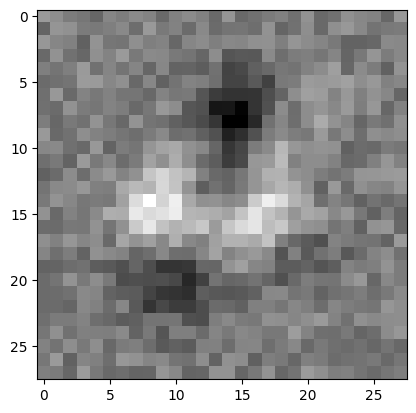

Epoch[23/100], loss geral: 0.687413, acc geral: 0.854600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


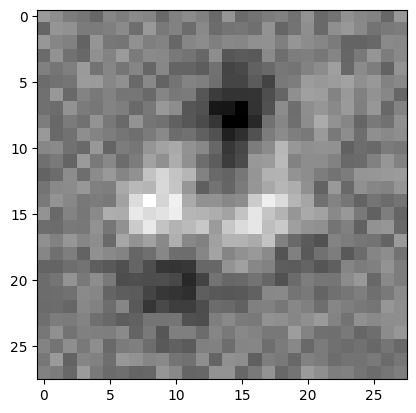

Epoch[24/100], loss geral: 0.675190, acc geral: 0.856800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


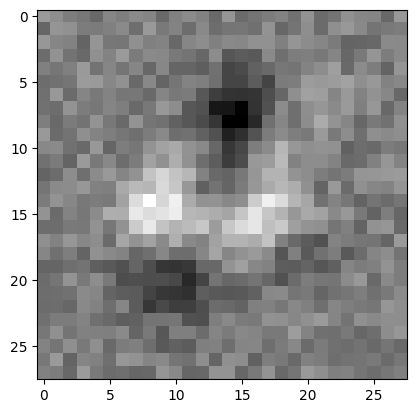

Epoch[25/100], loss geral: 0.663801, acc geral: 0.858600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


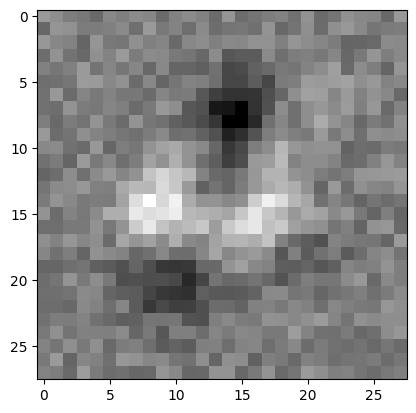

Epoch[26/100], loss geral: 0.653159, acc geral: 0.859700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


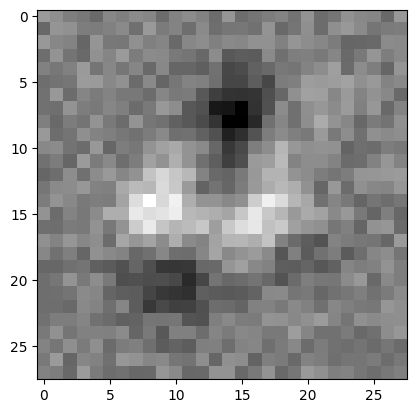

Epoch[27/100], loss geral: 0.643189, acc geral: 0.860900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


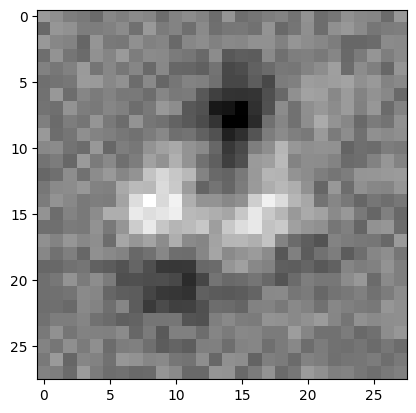

Epoch[28/100], loss geral: 0.633826, acc geral: 0.862200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


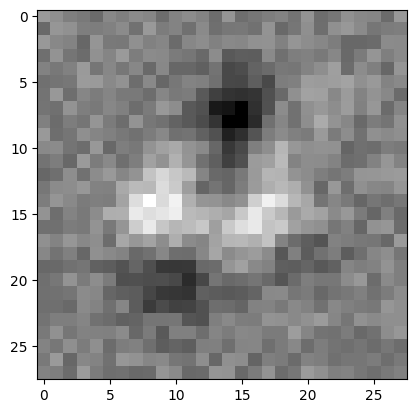

Epoch[29/100], loss geral: 0.625012, acc geral: 0.863000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


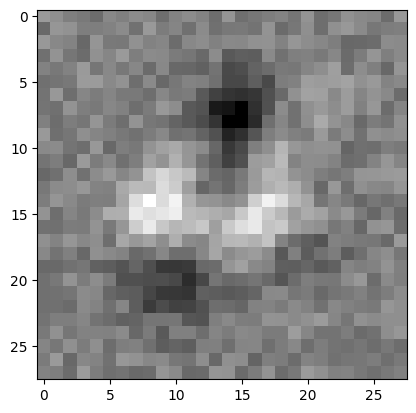

Epoch[30/100], loss geral: 0.616698, acc geral: 0.864000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


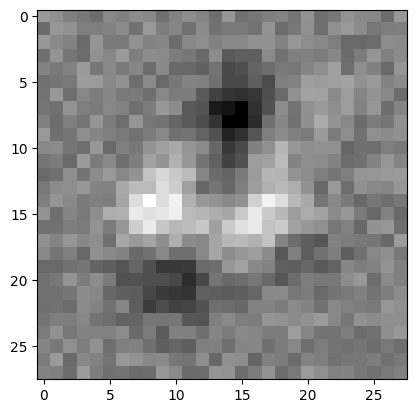

Epoch[31/100], loss geral: 0.608840, acc geral: 0.864600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


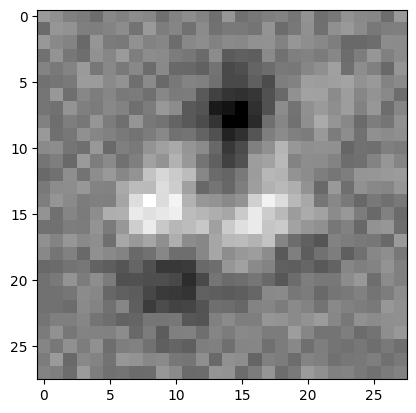

Epoch[32/100], loss geral: 0.601398, acc geral: 0.865700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


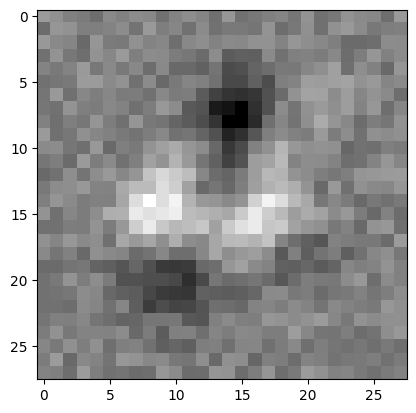

Epoch[33/100], loss geral: 0.594339, acc geral: 0.866700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


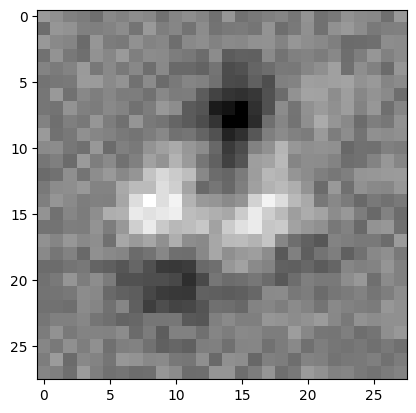

Epoch[34/100], loss geral: 0.587632, acc geral: 0.867600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


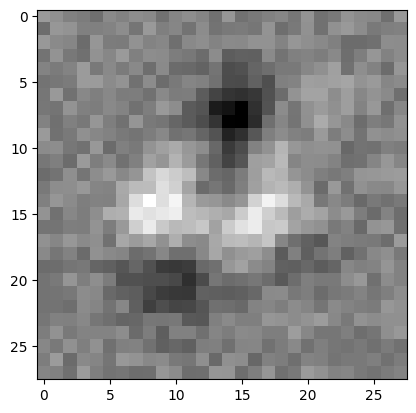

Epoch[35/100], loss geral: 0.581249, acc geral: 0.869100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


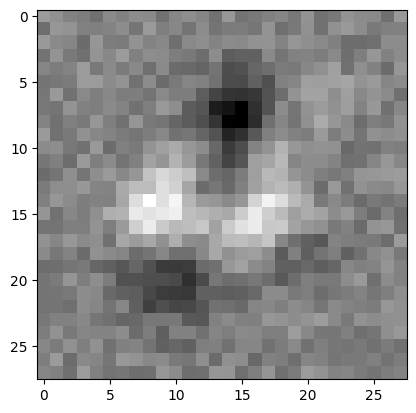

Epoch[36/100], loss geral: 0.575166, acc geral: 0.869900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


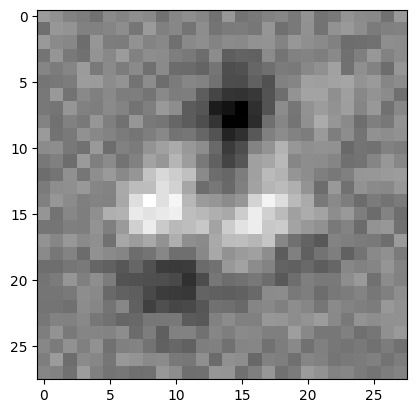

Epoch[37/100], loss geral: 0.569360, acc geral: 0.870400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


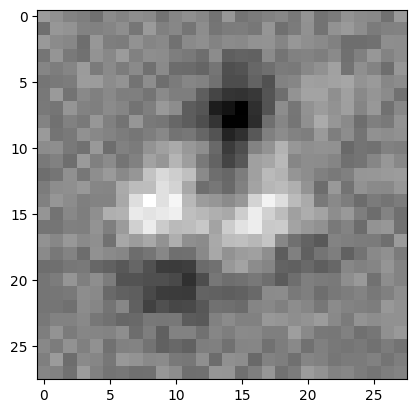

Epoch[38/100], loss geral: 0.563812, acc geral: 0.870600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


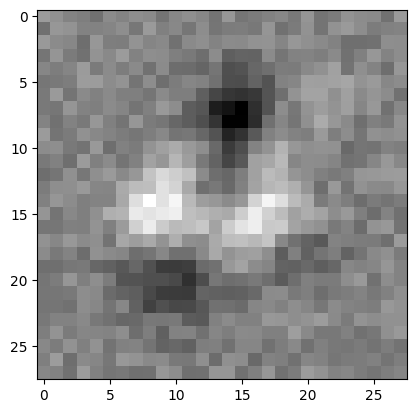

Epoch[39/100], loss geral: 0.558503, acc geral: 0.871300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


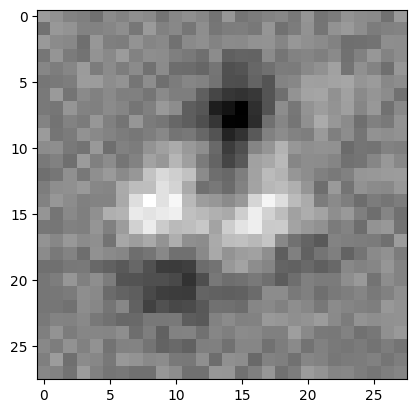

Epoch[40/100], loss geral: 0.553418, acc geral: 0.871900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


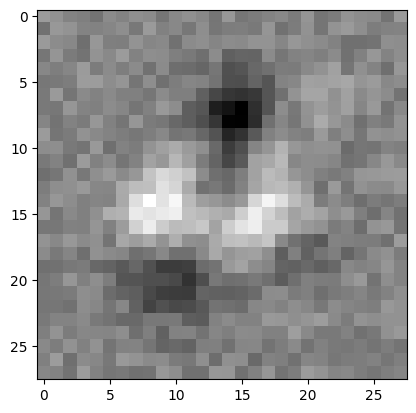

Epoch[41/100], loss geral: 0.548541, acc geral: 0.872500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


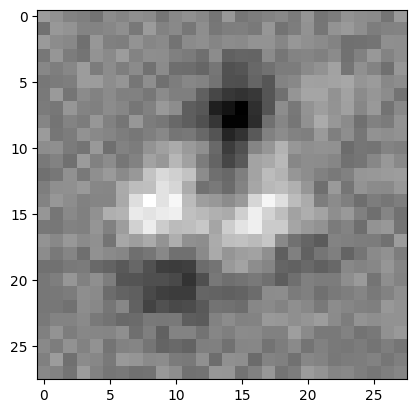

Epoch[42/100], loss geral: 0.543859, acc geral: 0.873900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


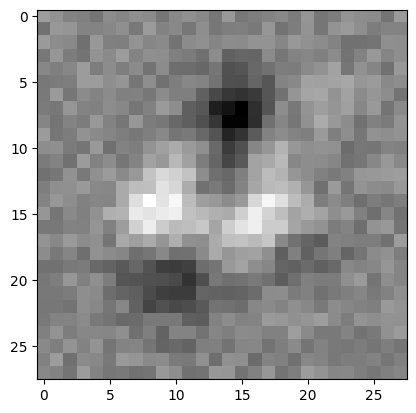

Epoch[43/100], loss geral: 0.539360, acc geral: 0.874500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


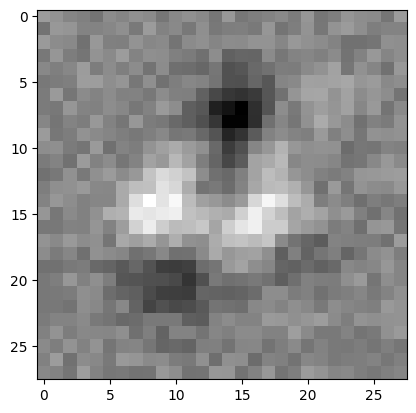

Epoch[44/100], loss geral: 0.535032, acc geral: 0.875400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


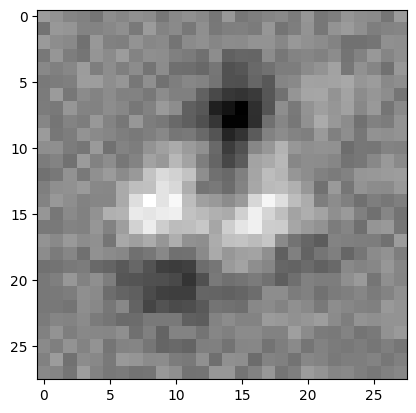

Epoch[45/100], loss geral: 0.530864, acc geral: 0.875900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


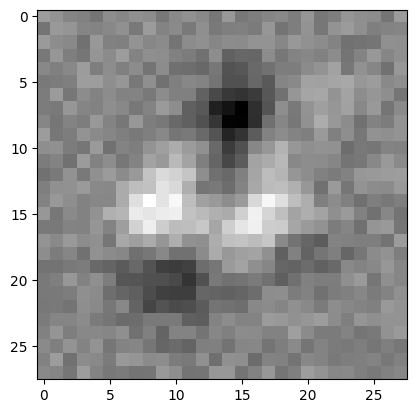

Epoch[46/100], loss geral: 0.526848, acc geral: 0.876900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


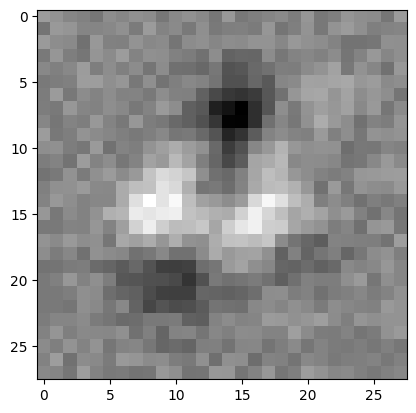

Epoch[47/100], loss geral: 0.522974, acc geral: 0.877400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


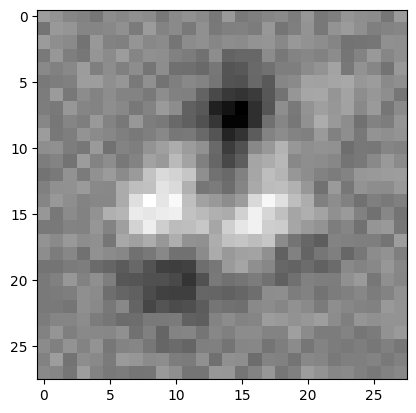

Epoch[48/100], loss geral: 0.519235, acc geral: 0.878200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


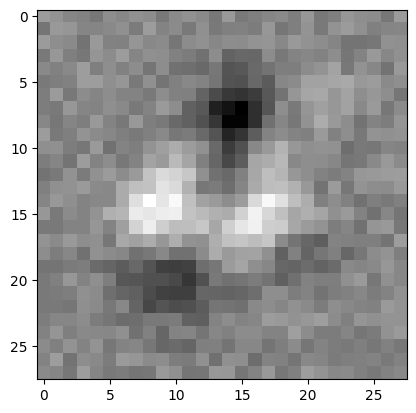

Epoch[49/100], loss geral: 0.515623, acc geral: 0.878300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


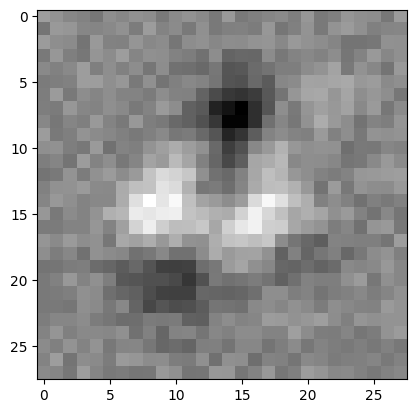

Epoch[50/100], loss geral: 0.512130, acc geral: 0.878800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


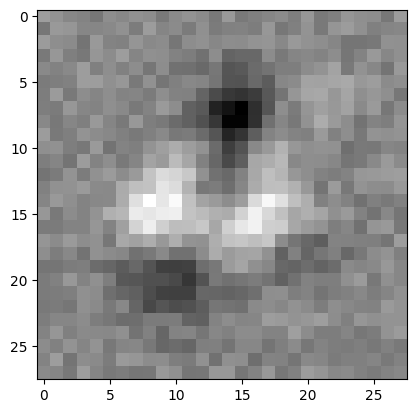

Epoch[51/100], loss geral: 0.508752, acc geral: 0.879500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


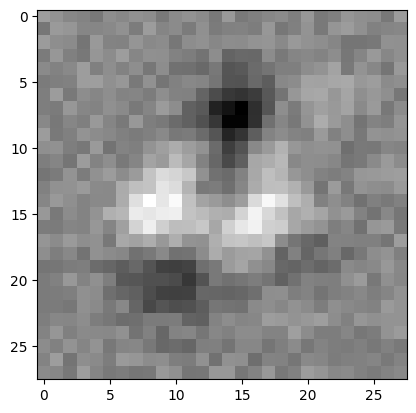

Epoch[52/100], loss geral: 0.505481, acc geral: 0.880300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


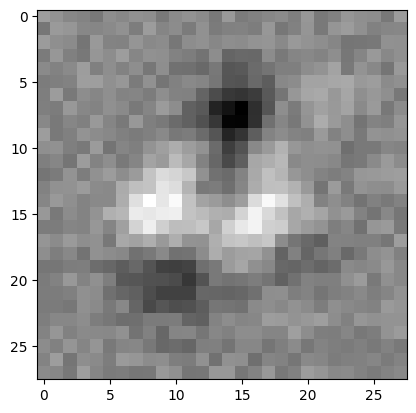

Epoch[53/100], loss geral: 0.502312, acc geral: 0.880700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


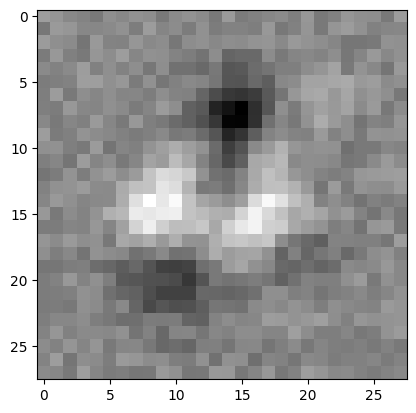

Epoch[54/100], loss geral: 0.499240, acc geral: 0.881400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


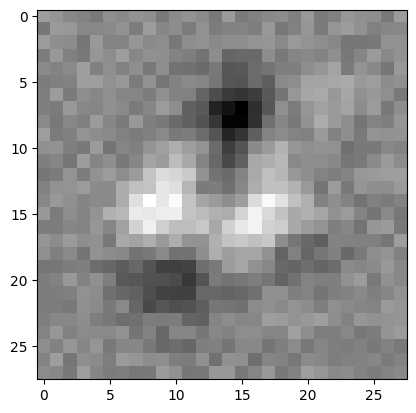

Epoch[55/100], loss geral: 0.496260, acc geral: 0.881500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


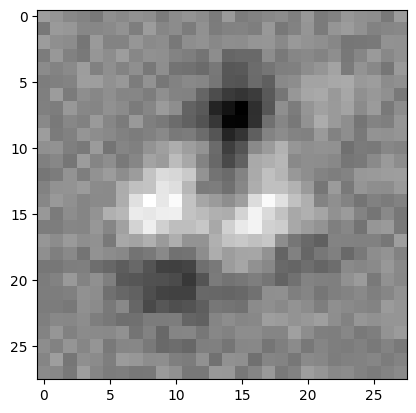

Epoch[56/100], loss geral: 0.493368, acc geral: 0.882100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


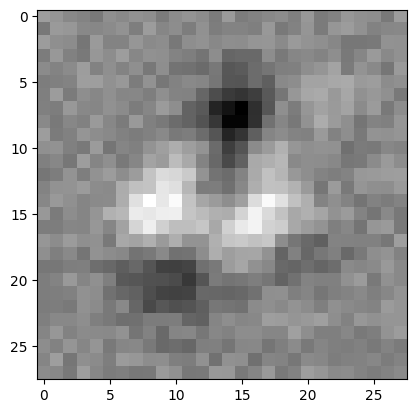

Epoch[57/100], loss geral: 0.490559, acc geral: 0.882600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


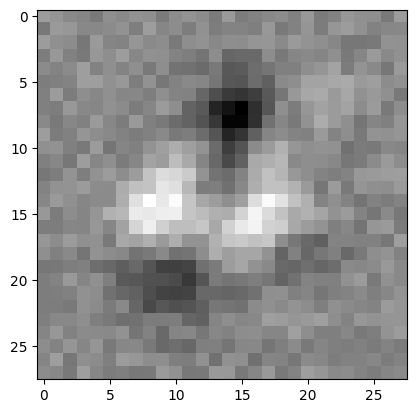

Epoch[58/100], loss geral: 0.487831, acc geral: 0.882900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


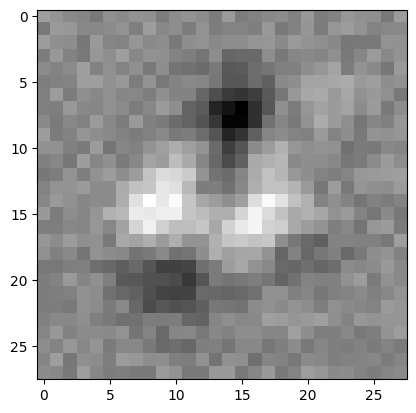

Epoch[59/100], loss geral: 0.485178, acc geral: 0.883400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


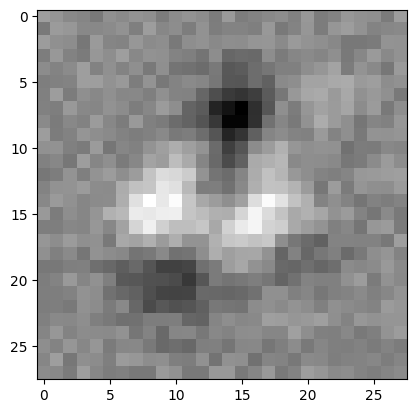

Epoch[60/100], loss geral: 0.482597, acc geral: 0.883600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


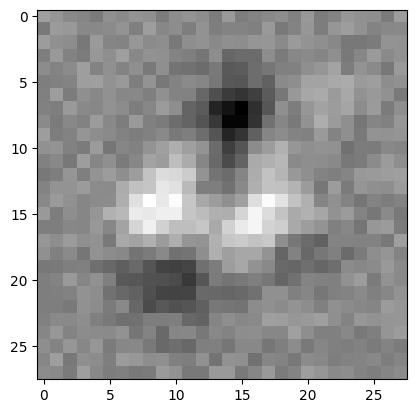

Epoch[61/100], loss geral: 0.480086, acc geral: 0.884000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


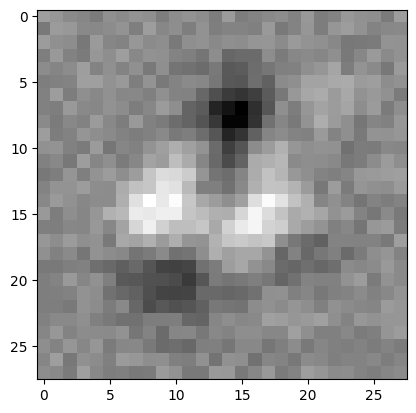

Epoch[62/100], loss geral: 0.477641, acc geral: 0.884300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


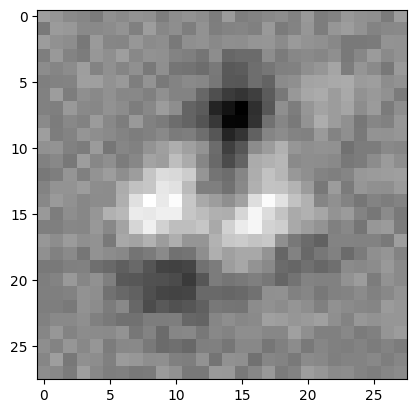

Epoch[63/100], loss geral: 0.475260, acc geral: 0.884900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


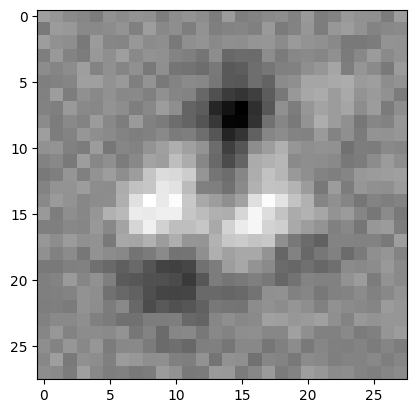

Epoch[64/100], loss geral: 0.472939, acc geral: 0.885000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


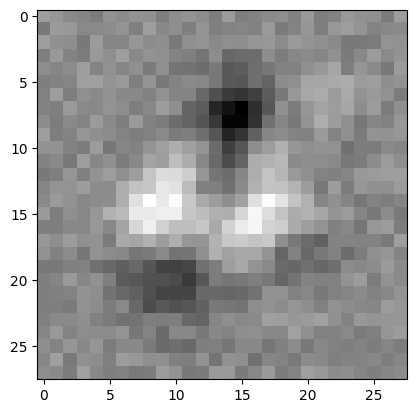

Epoch[65/100], loss geral: 0.470677, acc geral: 0.885900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


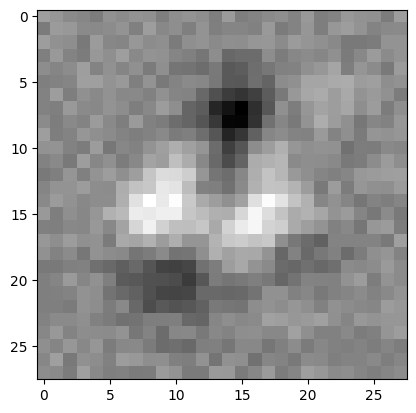

Epoch[66/100], loss geral: 0.468470, acc geral: 0.886200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


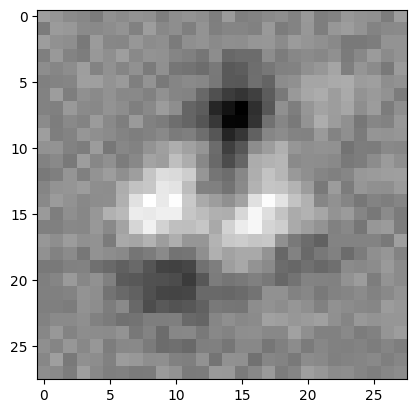

Epoch[67/100], loss geral: 0.466317, acc geral: 0.886600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


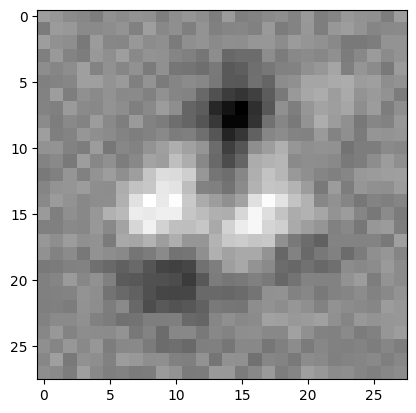

Epoch[68/100], loss geral: 0.464215, acc geral: 0.887200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


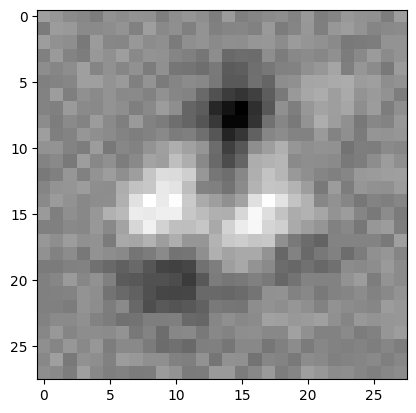

Epoch[69/100], loss geral: 0.462163, acc geral: 0.887500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


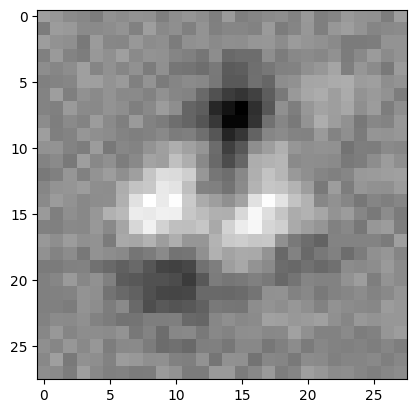

Epoch[70/100], loss geral: 0.460159, acc geral: 0.887600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


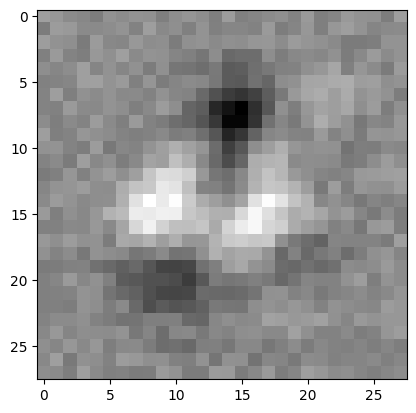

Epoch[71/100], loss geral: 0.458200, acc geral: 0.887700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


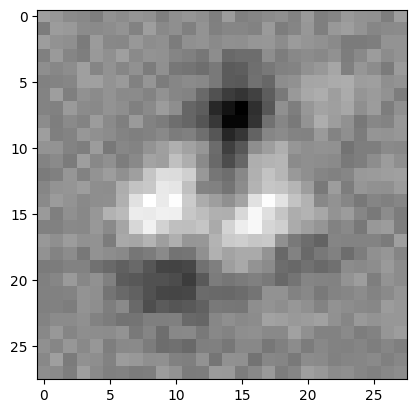

Epoch[72/100], loss geral: 0.456285, acc geral: 0.888000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


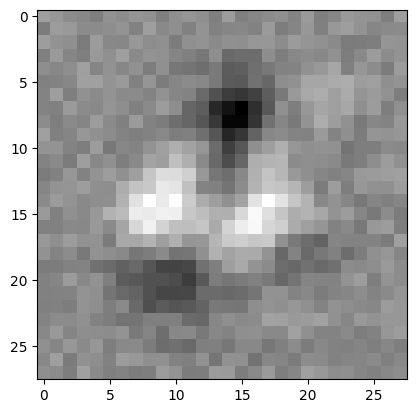

Epoch[73/100], loss geral: 0.454412, acc geral: 0.888200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


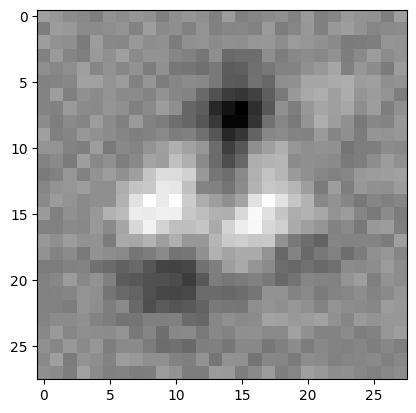

Epoch[74/100], loss geral: 0.452580, acc geral: 0.888600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


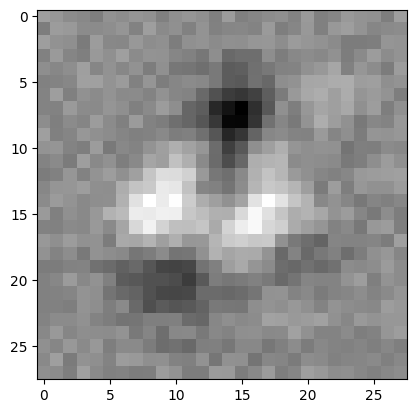

Epoch[75/100], loss geral: 0.450788, acc geral: 0.889000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


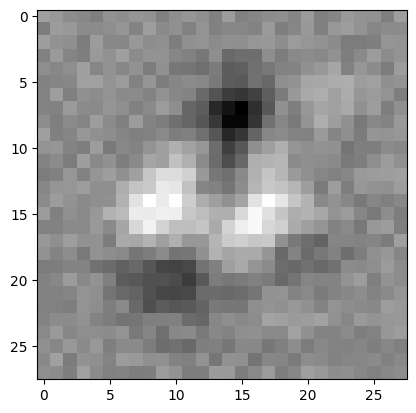

Epoch[76/100], loss geral: 0.449033, acc geral: 0.889200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


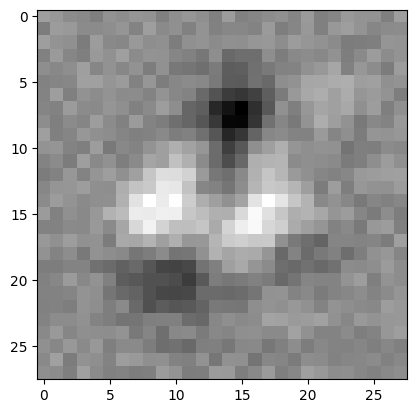

Epoch[77/100], loss geral: 0.447315, acc geral: 0.889700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


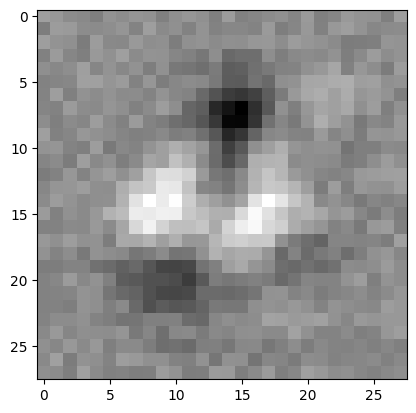

Epoch[78/100], loss geral: 0.445633, acc geral: 0.890000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


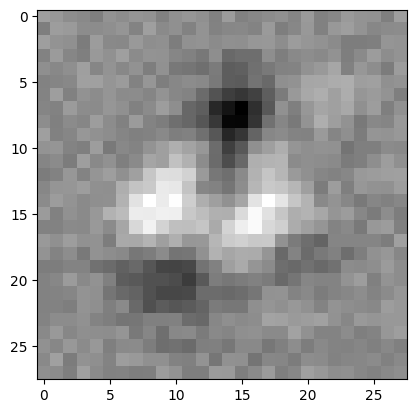

Epoch[79/100], loss geral: 0.443984, acc geral: 0.890100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


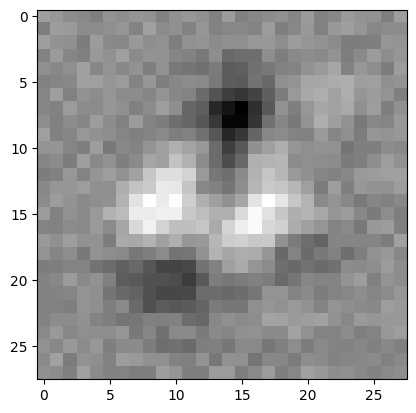

Epoch[80/100], loss geral: 0.442369, acc geral: 0.890300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


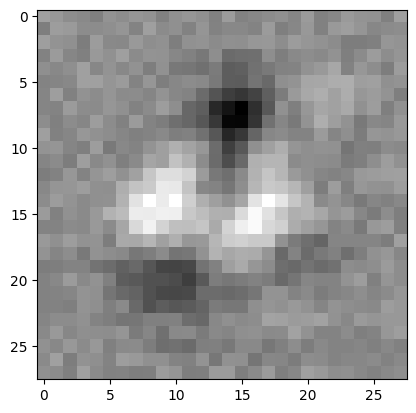

Epoch[81/100], loss geral: 0.440785, acc geral: 0.890500
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


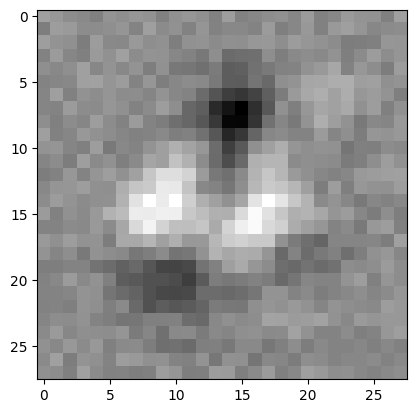

Epoch[82/100], loss geral: 0.439233, acc geral: 0.890600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


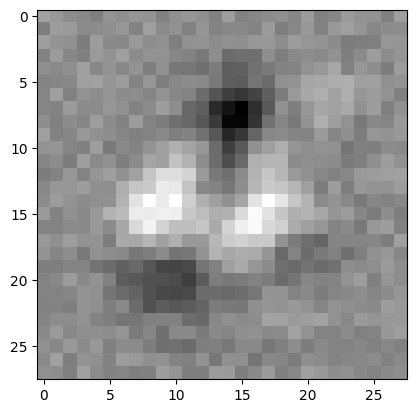

Epoch[83/100], loss geral: 0.437710, acc geral: 0.890700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


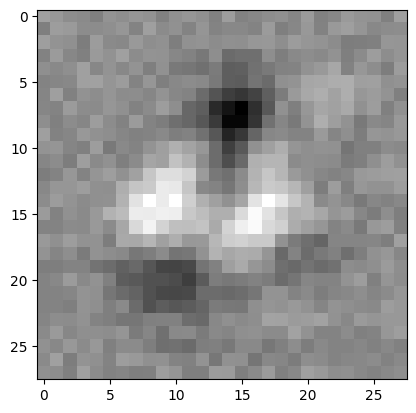

Epoch[84/100], loss geral: 0.436216, acc geral: 0.891400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


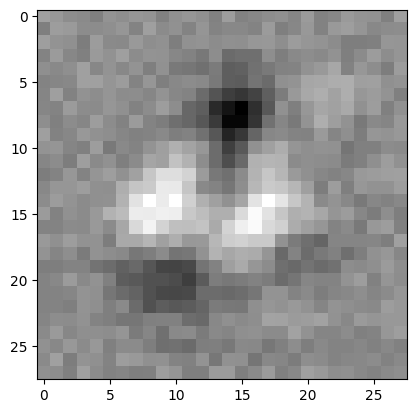

Epoch[85/100], loss geral: 0.434751, acc geral: 0.891600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


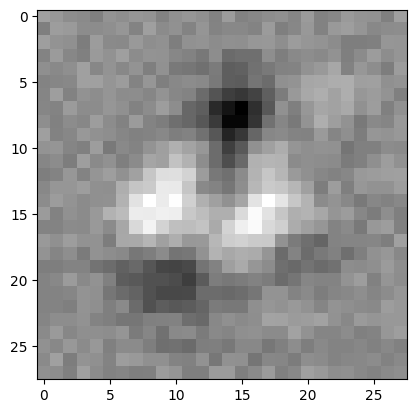

Epoch[86/100], loss geral: 0.433312, acc geral: 0.891900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


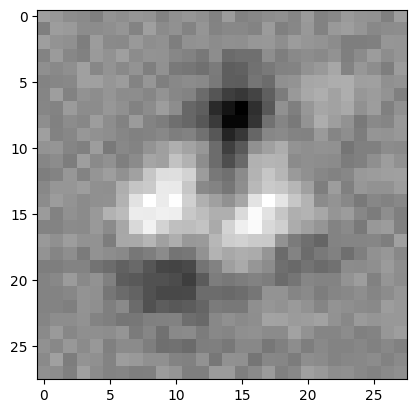

Epoch[87/100], loss geral: 0.431900, acc geral: 0.892000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


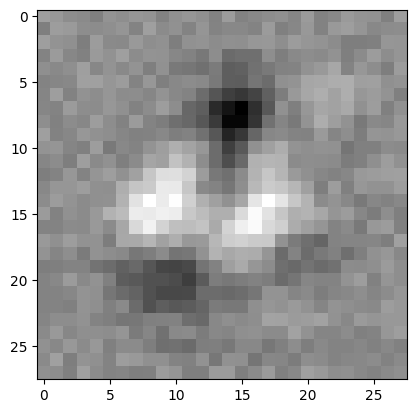

Epoch[88/100], loss geral: 0.430513, acc geral: 0.892200
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


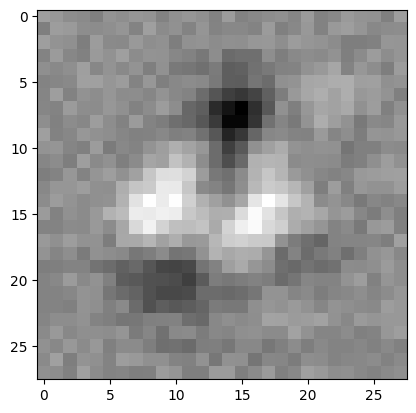

Epoch[89/100], loss geral: 0.429151, acc geral: 0.892600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


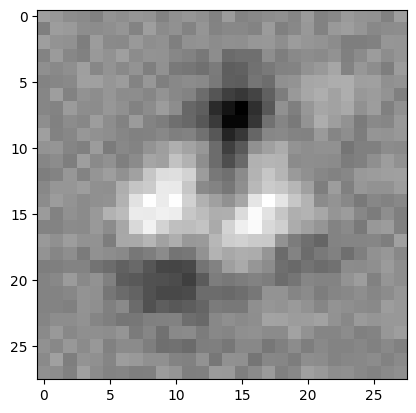

Epoch[90/100], loss geral: 0.427812, acc geral: 0.892700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


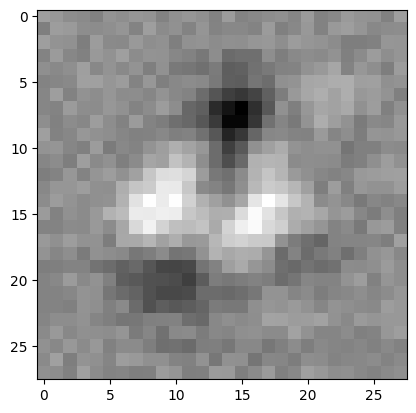

Epoch[91/100], loss geral: 0.426498, acc geral: 0.893000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


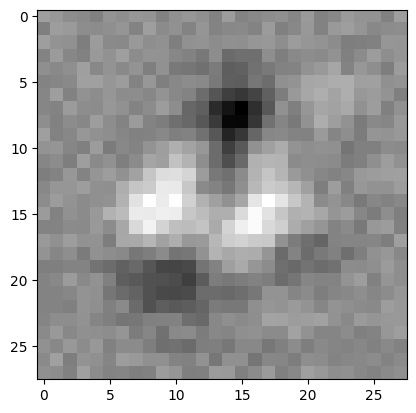

Epoch[92/100], loss geral: 0.425205, acc geral: 0.893300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


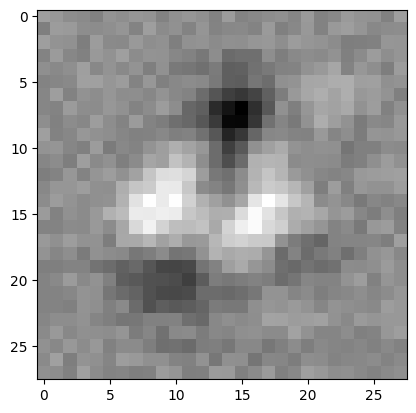

Epoch[93/100], loss geral: 0.423935, acc geral: 0.893700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


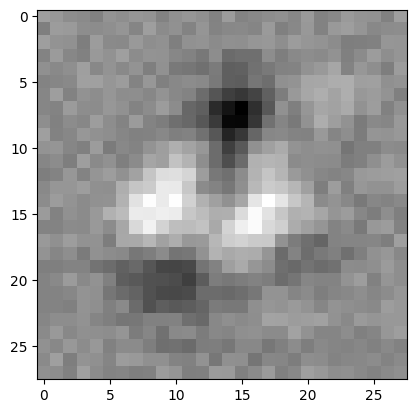

Epoch[94/100], loss geral: 0.422686, acc geral: 0.893900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


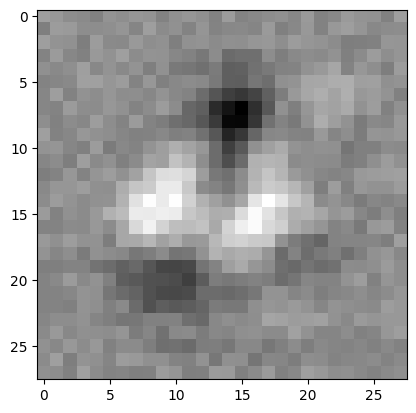

Epoch[95/100], loss geral: 0.421458, acc geral: 0.894300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


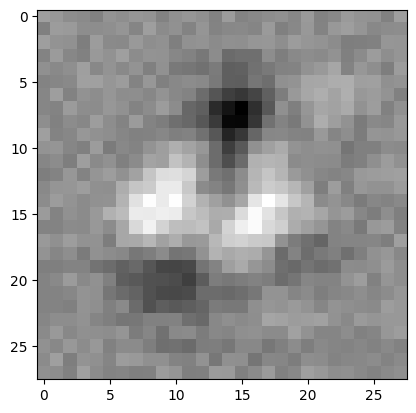

Epoch[96/100], loss geral: 0.420250, acc geral: 0.894300
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


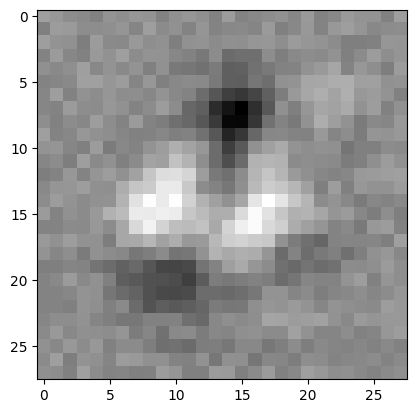

Epoch[97/100], loss geral: 0.419061, acc geral: 0.894600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


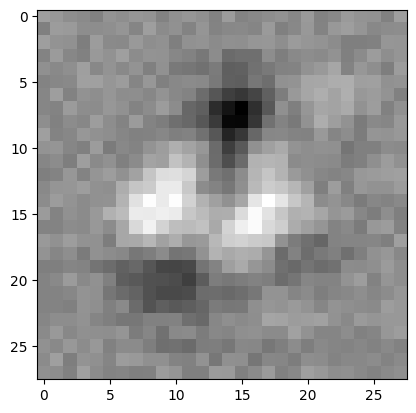

Epoch[98/100], loss geral: 0.417892, acc geral: 0.894800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


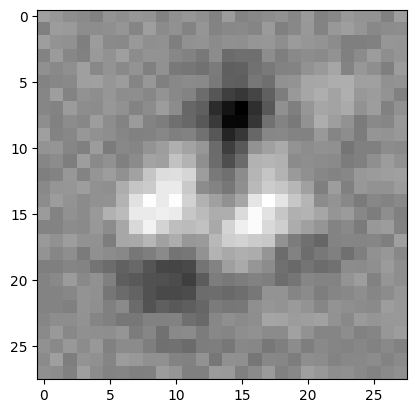

Epoch[99/100], loss geral: 0.416741, acc geral: 0.895100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


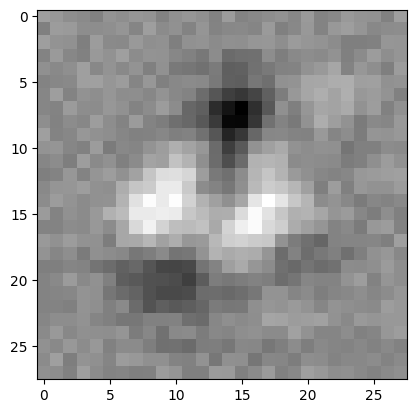

Epoch[100/100], loss geral: 0.415608, acc geral: 0.895100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


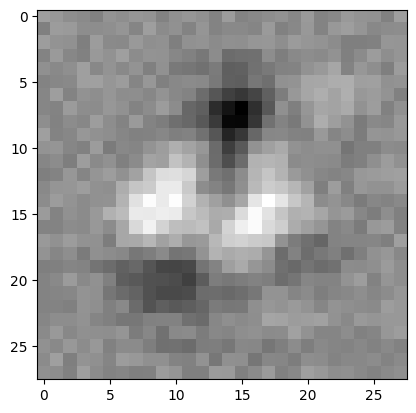

In [26]:
losses = [] #Lista para armazenar os valores de perdas
import numpy
zs = [] #Lista das saídas da rede

for i in range(epochs):
    # Transforma a entrada para uma dimensão [28 x 28] para [784]
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs) #ypred = x . wT ---> formato (1000,10)  -- probabilidades para cada valor de 0 a 9 dentre para cada uam das 1000 instâncias

    # z0 a z9 (Adicionar as probabilidades preditas em cada época em uma lista)

    zs.append(outputs.detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    #Valor de saída com maior probabilidade
    _, predicts = torch.max(outputs, 1)

    #Cálculo da acurácia (Predições corretas)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss geral: {:.6f}, acc geral: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 4
    print('Pesos da classe 4')
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

In [27]:
zs

[array([[ 0.17470425,  0.10928138,  0.28931552, ..., -0.02570099,
          0.18293813, -0.10840288],
        [ 0.40324134,  0.3751598 ,  0.37693587, ...,  0.11847417,
         -0.0057371 , -0.08737712],
        [ 0.18403484,  0.07344875,  0.3018252 , ...,  0.00129303,
         -0.14087157, -0.15867603],
        ...,
        [ 0.28024775,  0.06787731, -0.14784344, ..., -0.04177963,
          0.12578824, -0.11298053],
        [ 0.22859229,  0.16833924,  0.1534411 , ...,  0.13957231,
          0.07721554, -0.17546697],
        [ 0.1641623 , -0.11286586,  0.20363721, ..., -0.08556621,
          0.15352032,  0.06928158]], dtype=float32),
 array([[ 0.17994   , -0.29903942,  0.05218471, ..., -0.03293945,
          0.32544222, -0.05120555],
        [ 1.1207812 , -0.26614285,  0.1070018 , ..., -0.01229333,
          0.05023623, -0.11179918],
        [ 0.14903201, -0.35234636,  0.23009694, ..., -0.03554933,
         -0.10664566, -0.0297773 ],
        ...,
        [-0.12137006,  0.01447745, -0.1

In [28]:
#100 valores. Número de épocas
len(zs)

100

In [29]:
#10000 valores (1 para cada amostra)
print(len(zs[0]))
zs[0]

10000


array([[ 0.17470425,  0.10928138,  0.28931552, ..., -0.02570099,
         0.18293813, -0.10840288],
       [ 0.40324134,  0.3751598 ,  0.37693587, ...,  0.11847417,
        -0.0057371 , -0.08737712],
       [ 0.18403484,  0.07344875,  0.3018252 , ...,  0.00129303,
        -0.14087157, -0.15867603],
       ...,
       [ 0.28024775,  0.06787731, -0.14784344, ..., -0.04177963,
         0.12578824, -0.11298053],
       [ 0.22859229,  0.16833924,  0.1534411 , ...,  0.13957231,
         0.07721554, -0.17546697],
       [ 0.1641623 , -0.11286586,  0.20363721, ..., -0.08556621,
         0.15352032,  0.06928158]], dtype=float32)

In [30]:
#10 valores (0 a 9)
print(len(zs[0][0]))
zs[0][0]

10


array([ 0.17470425,  0.10928138,  0.28931552, -0.09775921, -0.26198745,
        0.04491363, -0.25046143, -0.02570099,  0.18293813, -0.10840288],
      dtype=float32)

In [31]:
print(y_pred) #Valores preditos

tensor([3, 0, 4,  ..., 6, 9, 7])


In [32]:
x_train.view(-1, 28 * 28).shape


torch.Size([10000, 784])

In [33]:
weights.data.shape

torch.Size([10, 784])

ypred = x_train.view . wT

x_train = (10000,784)

wT = (784,10)

ypred = (10000,784) x (10000,10)

ypred = (10000 , 10) -- 10 probabilidades (0 a 9) para cada instância

In [34]:
print('Final loss:', loss.item())

Final loss: 0.41560816764831543


##### ypred

In [35]:
#Valores preditos com os parametros ajustados após 100 épocas
output = model(x_train.view(-1,28*28))
output

tensor([[ 0.2179, -2.3799, -0.0483,  ...,  0.4026,  0.4450, -0.6694],
        [ 8.0155, -4.2236, -0.2293,  ..., -0.5963, -0.0535, -0.9823],
        [-0.7397, -3.1129,  0.5069,  ..., -0.9222, -0.2002,  1.1731],
        ...,
        [-2.9171,  1.3882,  2.0107,  ..., -2.3321,  0.9689, -1.8075],
        [-2.7919, -2.0007, -1.5831,  ...,  0.8245,  1.1685,  4.2444],
        [-0.6687, -2.6002, -1.7453,  ...,  5.4111, -0.3815,  3.2570]],
       grad_fn=<AddmmBackward0>)

In [36]:
print(output[0]) #Primeiro número predito
print(torch.max(output,1)[0][0]) # Valor resultante da regressão logística
print(torch.max(output,1)[1][0]) #Número predito (Maior probabilidade)

tensor([ 0.2179, -2.3799, -0.0483,  3.2784, -3.8591,  3.1167, -0.4471,  0.4026,
         0.4450, -0.6694], grad_fn=<SelectBackward0>)
tensor(3.2784, grad_fn=<SelectBackward0>)
tensor(3)


In [37]:
print(output[20])
print(torch.max(output,1)[0][20])
print(torch.max(output,1)[1][20])

tensor([-2.2606, -4.0445,  0.8092,  0.6692,  6.2371, -2.4854,  0.4867, -2.0545,
        -0.1285,  3.1322], grad_fn=<SelectBackward0>)
tensor(6.2371, grad_fn=<SelectBackward0>)
tensor(4)


### Visualizando gráfico de perda durante o treinamento

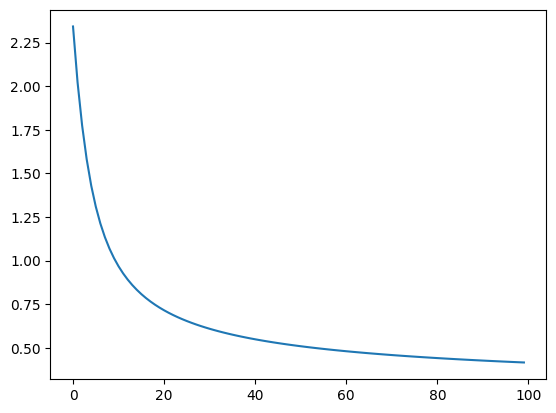

In [38]:
#Gráfico da perda (loss) ao longo das épocas
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [39]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.8953


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1001
           1       0.91      0.96      0.94      1127
           2       0.90      0.86      0.88       991
           3       0.88      0.86      0.87      1032
           4       0.89      0.91      0.90       980
           5       0.86      0.79      0.83       863
           6       0.91      0.95      0.93      1014
           7       0.92      0.91      0.91      1070
           8       0.86      0.84      0.85       944
           9       0.86      0.88      0.87       978

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.90      0.89     10000



<Figure size 1600x1200 with 0 Axes>

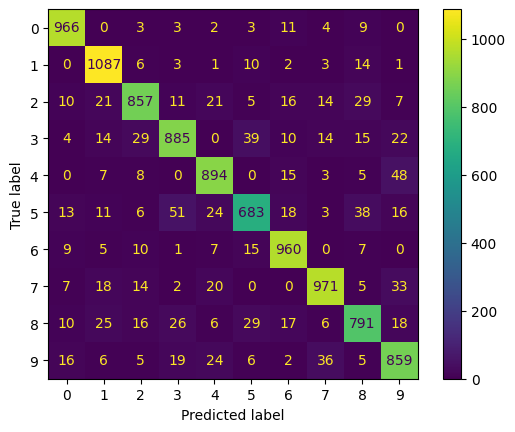

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_train, y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmd.plot()

plt.show()

## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


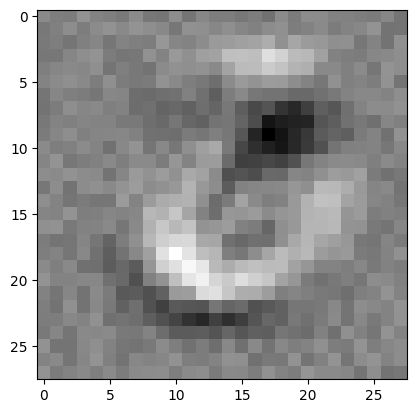

In [41]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 6
plt.imshow(weights[6, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

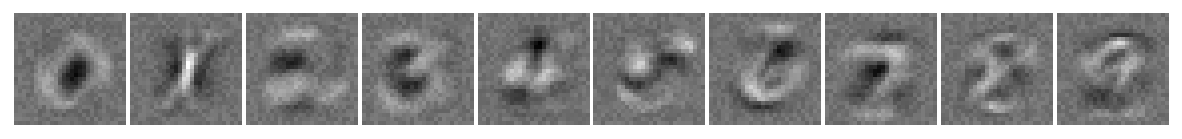

In [42]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Na configuração da figura acima, mostre os valores de z0 até z9, os valores das probabilidades y_hat, após o softmax, quando a rede recebe como entrada a nona amostra que contém o manuscrito do dígito '4':

In [43]:
output = model(x_train.view(-1,28*28))

print(f'Valores de z0 a z9: {output[9].data}')

y_hat = torch.softmax(output, dim=1)

print(f' Valores das probabilidades previstas: {y_hat[9].data}')

print(torch.max(y_hat[9])) # A maior probabilidade foi de ser o quinta valor da lista, o número 4 (0,1,2,3,4)

Valores de z0 a z9: tensor([-1.9151, -2.9294, -0.4205, -1.9530,  5.2112,  0.8470,  0.4673, -0.2778,
         0.6318,  0.6915])
 Valores das probabilidades previstas: tensor([7.6386e-04, 2.7701e-04, 3.4049e-03, 7.3540e-04, 9.5042e-01, 1.2094e-02,
        8.2728e-03, 3.9270e-03, 9.7519e-03, 1.0352e-02])
tensor(0.9504, grad_fn=<MaxBackward1>)


- 2) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

**Insirido no código**

- 3) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

**Inserido no código**

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
**28x28 (784 pixels)**
2. Qual é o shape da saída da rede?
**10 (valores de 0 a 9)**
3. Qual é o número total de parâmetros da rede, incluindo o bias?
**(28 x 28 x 10) + 10 = 7850**

*torch.nn.Linear(28 x 28,10)*

# Matrizes de confusão com novos valores de Learning rate

### Learning rate 0.1

In [44]:
# Rede Linear 28*28 atributos de entrada e 10 neurônios na sáida
model = torch.nn.Linear(28*28, 10)

epochs = 100 # Número de épocas
learningRate = 0.1 # Taxa de aprendizado

# Utilizaremos CrossEntropyLoss como função de perda
#https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [45]:
losses_lr01 = [] #Lista para armazenar os valores de perdas
import numpy
zs = [] #Lista das saídas da rede

for i in range(epochs):
    # Transforma a entrada para uma dimensão [28 x 28] para [784]
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs) #ypred = x . wT ---> formato (1000,10)  -- probabilidades para cada valor de 0 a 9 dentre para cada uam das 1000 instâncias

    # z0 a z9 (Adicionar as probabilidades preditas em cada época em uma lista)

    zs.append(outputs.detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses_lr01.append(loss.item())

    #Valor de saída com maior probabilidade
    _, predicts = torch.max(outputs, 1)

    #Cálculo da acurácia
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss geral: {:.6f}, acc geral: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)


Epoch[1/100], loss geral: 2.331706, acc geral: 0.076800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[2/100], loss geral: 2.213967, acc geral: 0.254700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[3/100], loss geral: 2.110056, acc geral: 0.478400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[4/100], loss geral: 2.015558, acc geral: 0.593600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[5/100], loss geral: 1.928715, acc geral: 0.659600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[6/100], loss geral: 1.848642, acc geral: 0.694800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[7/100], loss geral: 1.774744, acc geral: 0.719400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[8/100], loss geral: 1.706531, acc geral: 0.739000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[9/100], loss geral: 1.643552, acc geral: 0.751500
weights: torch.Size([10, 784])
bias:    

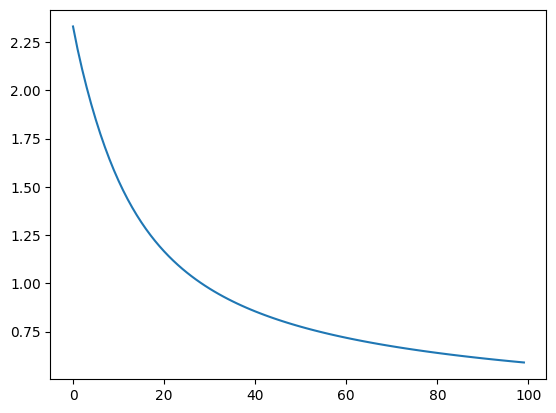

In [46]:
plt.plot(losses_lr01)

In [47]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.8678


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1001
           1       0.87      0.96      0.91      1127
           2       0.88      0.84      0.86       991
           3       0.83      0.84      0.84      1032
           4       0.87      0.88      0.87       980
           5       0.86      0.69      0.76       863
           6       0.90      0.93      0.91      1014
           7       0.91      0.89      0.90      1070
           8       0.82      0.80      0.81       944
           9       0.81      0.85      0.83       978

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



<Figure size 1600x1200 with 0 Axes>

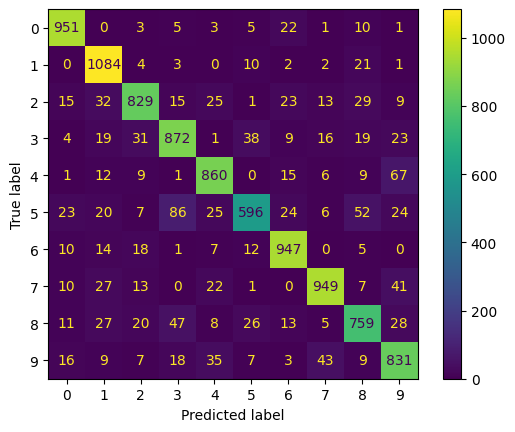

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_train, y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmd.plot()

plt.show()

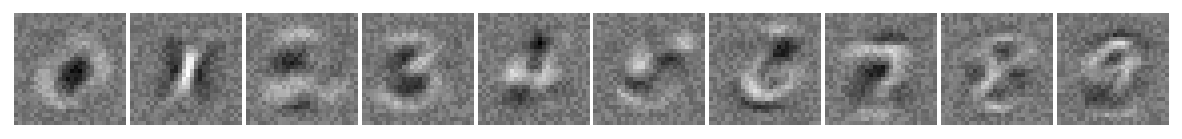

In [49]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Learning rate 0.5

In [50]:
# Rede Linear 28*28 atributos de entrada e 10 neurônios na sáida
model = torch.nn.Linear(28*28, 10)

epochs = 100 # Número de épocas
learningRate = 0.5 # Taxa de aprendizado

# Utilizaremos CrossEntropyLoss como função de perda
#https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [51]:
losses_lr05 = [] #Lista para armazenar os valores de perdas
import numpy
zs = [] #Lista das saídas da rede

for i in range(epochs):
    # Transforma a entrada para uma dimensão [28 x 28] para [784]
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs) #ypred = x . wT ---> formato (1000,10)  -- probabilidades para cada valor de 0 a 9 dentre para cada uam das 1000 instâncias

    # z0 a z9 (Adicionar as probabilidades preditas em cada época em uma lista)

    zs.append(outputs.detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses_lr05.append(loss.item())

    #Valor de saída com maior probabilidade
    _, predicts = torch.max(outputs, 1)

    #Cálculo da acurácia
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss geral: {:.6f}, acc geral: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)


Epoch[1/100], loss geral: 2.298960, acc geral: 0.124100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[2/100], loss geral: 1.819866, acc geral: 0.581600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[3/100], loss geral: 1.498580, acc geral: 0.739900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[4/100], loss geral: 1.285181, acc geral: 0.751100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[5/100], loss geral: 1.138553, acc geral: 0.797000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[6/100], loss geral: 1.028877, acc geral: 0.801100
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[7/100], loss geral: 0.948212, acc geral: 0.823400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[8/100], loss geral: 0.885959, acc geral: 0.823600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[9/100], loss geral: 0.836264, acc geral: 0.837000
weights: torch.Size([10, 784])
bias:    

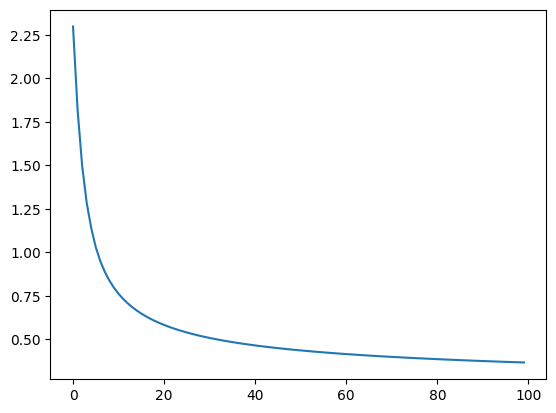

In [52]:
plt.plot(losses_lr05)

In [53]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9047


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1001
           1       0.92      0.97      0.94      1127
           2       0.90      0.87      0.89       991
           3       0.89      0.87      0.88      1032
           4       0.91      0.92      0.91       980
           5       0.88      0.82      0.85       863
           6       0.92      0.95      0.93      1014
           7       0.93      0.91      0.92      1070
           8       0.87      0.85      0.86       944
           9       0.87      0.89      0.88       978

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<Figure size 1600x1200 with 0 Axes>

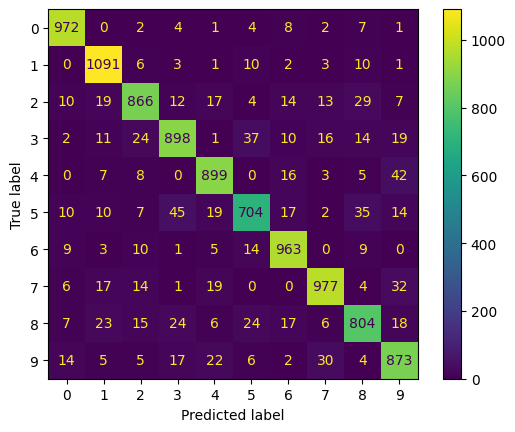

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_train, y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmd.plot()

plt.show()

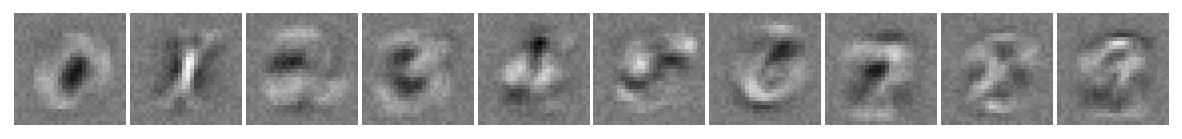

In [55]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Learning rate 1

In [56]:
# Rede Linear 28*28 atributos de entrada e 10 neurônios na sáida
model = torch.nn.Linear(28*28, 10)

epochs = 100 # Número de épocas
learningRate = 1 # Taxa de aprendizado

# Utilizaremos CrossEntropyLoss como função de perda
#https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [57]:
losses_lr10 = [] #Lista para armazenar os valores de perdas
import numpy
zs = [] #Lista das saídas da rede

for i in range(epochs):
    # Transforma a entrada para uma dimensão [28 x 28] para [784]
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs) #ypred = x . wT ---> formato (1000,10)  -- probabilidades para cada valor de 0 a 9 dentre para cada uam das 1000 instâncias

    # z0 a z9 (Adicionar as probabilidades preditas em cada época em uma lista)

    zs.append(outputs.detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses_lr10.append(loss.item())

    #Valor de saída com maior probabilidade
    _, predicts = torch.max(outputs, 1)

    #Cálculo da acurácia
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss geral: {:.6f}, acc geral: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)


Epoch[1/100], loss geral: 2.302583, acc geral: 0.105700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[2/100], loss geral: 1.475657, acc geral: 0.656700
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[3/100], loss geral: 1.375288, acc geral: 0.604400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[4/100], loss geral: 1.621878, acc geral: 0.526000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[5/100], loss geral: 1.897829, acc geral: 0.587600
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[6/100], loss geral: 1.283777, acc geral: 0.624800
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[7/100], loss geral: 1.137292, acc geral: 0.636900
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[8/100], loss geral: 1.106481, acc geral: 0.644400
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[9/100], loss geral: 1.237226, acc geral: 0.701200
weights: torch.Size([10, 784])
bias:    

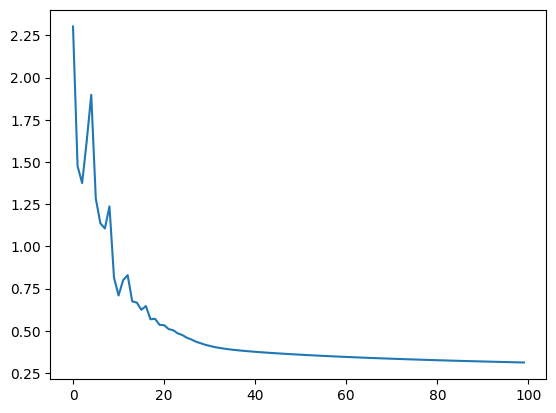

In [58]:
plt.plot(losses_lr10)

In [59]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9175


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1001
           1       0.93      0.97      0.95      1127
           2       0.91      0.88      0.90       991
           3       0.91      0.88      0.90      1032
           4       0.92      0.93      0.92       980
           5       0.88      0.86      0.87       863
           6       0.93      0.96      0.95      1014
           7       0.93      0.92      0.93      1070
           8       0.90      0.87      0.88       944
           9       0.88      0.91      0.89       978

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<Figure size 1600x1200 with 0 Axes>

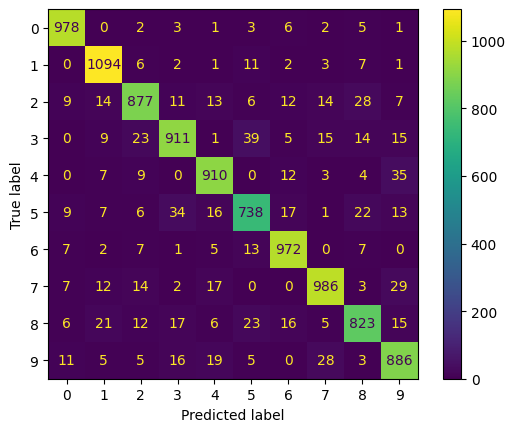

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_train, y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmd.plot()

plt.show()

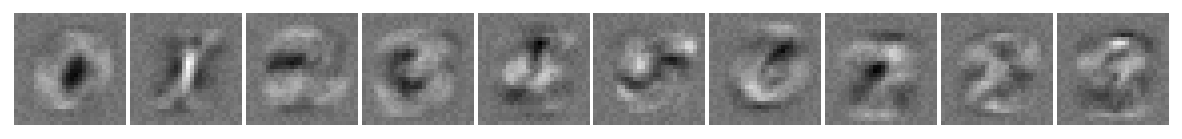

In [61]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

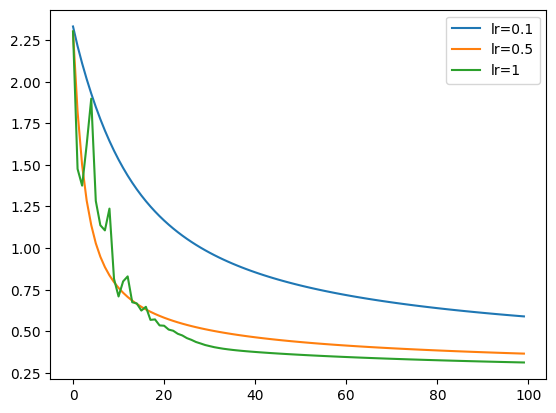

In [62]:
fig, ax = plt.subplots()

plt.plot(losses_lr01, label='lr=0.1')

plt.plot(losses_lr05, label='lr=0.5')

plt.plot(losses_lr10, label='lr=1')

plt.legend()
plt.show()

O learning rate de 1 apresentou a menor perda no final das 100 épocas, apesar de ter sofrido instabilidade/oscilação nas primeiras 20 épocas.

# Aprendizados



**Regressao Logística**
A regressão logística estima a probabilidade de ocorrência de um evento, como voto ou não voto, com base em um determinado conjunto de dados de variáveis independentes.

Esse tipo de modelo estatístico (também conhecido como modelo logit) frequentemente é usado para classificação e análise preditiva de dados. Como o resultado é uma probabilidade, a variável dependente é limitada entre 0 e 1


**Cross Entropy Loss**

A entropia cruzada, também conhecida como perda logarítmica ou perda de log, é uma função de perda popular usada no aprendizado de máquina para medir o desempenho de um modelo de classificação.
A entropia cruzada mede a diferença entre a distribuição de probabilidade descoberta de um modelo de classificação e os valores previstos.

**Matriz de Confusão**
A matriz de confusão ajuda a avaliar o desempenho do modelo de classificação no aprendizado de máquina comparando os valores previstos com os valores reais de um conjunto de dados.

Uma matriz de confusão (ou matriz de erro) é um método de visualização para resultados de algoritmo classificador. Mais especificamente, é uma tabela que decompõe o número de instâncias da verdade fundamental de uma classe específica em relação ao número de instâncias de classes previstas.

#Conceitos fundamentais

**Redes Neurais:**: Uma rede neural é um programa, ou modelo, de aprendizado de máquina que toma decisões de uma forma semelhante ao cérebro humano, utilizando processos que imitam a maneira como os neurônios biológicos trabalham juntos para identificar fenômenos, ponderar opções e chegar a conclusões.

Toda rede neural é composta por camadas de nós, ou neurônios artificiais: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó se conecta a outros e possui seu próprio peso e limiar associados

**Gradiente Descendente:**O gradiente descendente é um algoritmo de otimização comumente usado para treinar modelos de aprendizado de máquina e redes neurais. Ele treina modelos de aprendizado de máquina ao minimizar os erros entre os resultados previstos e os reais.

Os conceitos de Redes Neurais e gradientes descendentes foram utilizados nesse projeto para realizar um algoritmo de regressão linear com base nos dados Iris.


**Etapas do Laço de treinamento:**
- Predição dos valores com base nos dados de entrada (X)

- Cálculo da função perda. MSE foi usada no projeto.
  
  Perda de entropia cruzada / binária poderia ser usada para modelos de classificação.

- Cálculo do gradiente (utilizando a função perda e o learning rate)

- Atualização dos pesos iniciais usando o gradiente calculado

**Learning rate:** Taxa de aprendizagem. Parâmetro fundamental para o cálculo o gradiente descendente. Pequenos valores de Learning rate podem levar a um aprendizado mais lenta (mais épocas necessárias), grandes valores podem levar a um treinamento instável com dificuldade para convergir para a melhor solução
